In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

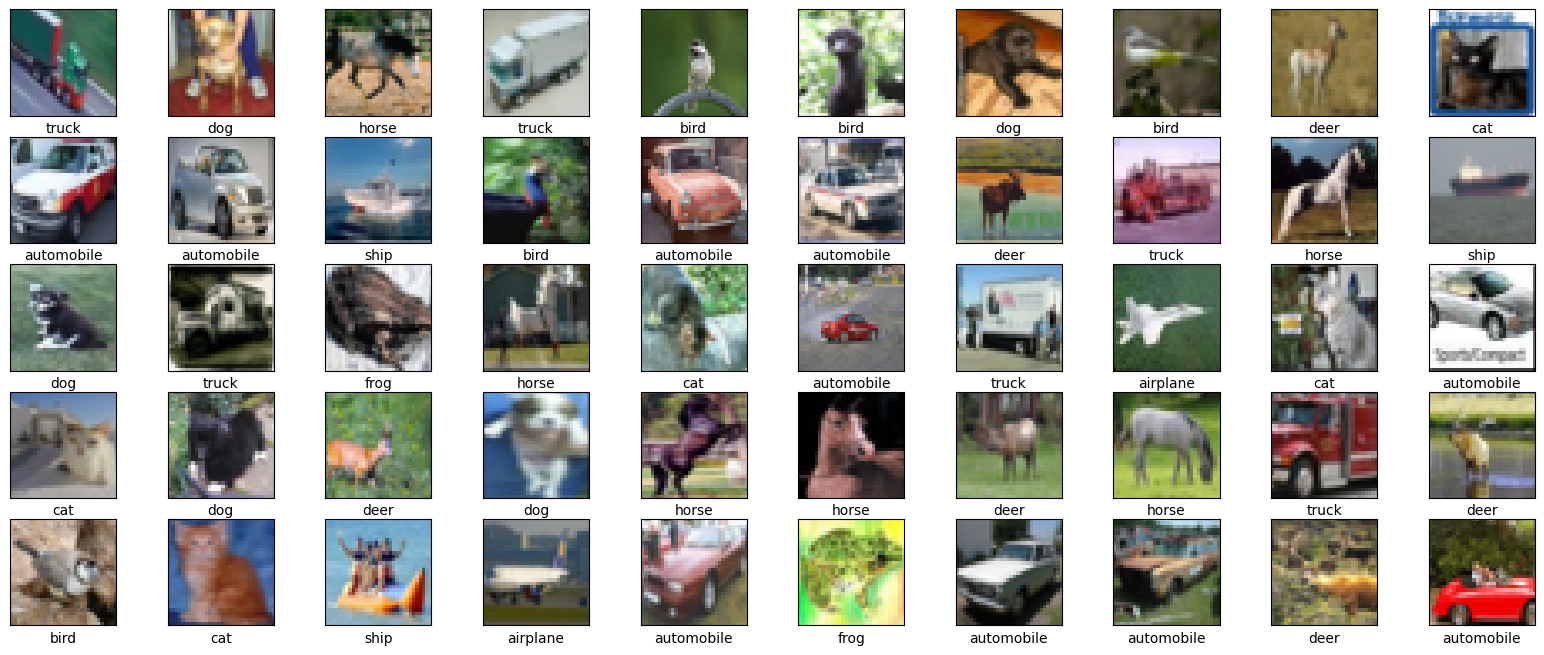

In [12]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[i+50])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[i+50][0]])
    
plt.show()

In [13]:

# Normalize pixel values to range 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [14]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l1(0.001)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model = build_cnn_model()


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [21]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [17]:
# Dictionary to store results
results = {}

# Experiment 1: Different Optimizers

optimizers = {
    "SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001)
}

for optimizer_name, optimizer in tqdm(optimizers.items()):
    model = build_cnn_model()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    results[optimizer_name] = history


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [19:46<00:00, 395.38s/it]


In [18]:
# Experiment 3: Comparison of Data Preprocessing
model_no_preprocessing = build_cnn_model()
model_no_preprocessing.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train without data preprocessing
history_no_preprocessing = model_no_preprocessing.fit(
    x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=0
)


In [19]:

# Evaluate all models
evaluations = {}
for name, history in tqdm(results.items()):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    evaluations[name] = {'loss': loss, 'accuracy': accuracy}

loss_no_pre, accuracy_no_pre = model_no_preprocessing.evaluate(x_test, y_test, verbose=0)
evaluations['No Preprocessing'] = {'loss': loss_no_pre, 'accuracy': accuracy_no_pre}

print(evaluations)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:09<00:00,  3.23s/it]


{'SGD': {'loss': 1.1526031494140625, 'accuracy': 0.642799973487854}, 'Adam': {'loss': 1.1526031494140625, 'accuracy': 0.642799973487854}, 'RMSprop': {'loss': 1.1526031494140625, 'accuracy': 0.642799973487854}, 'No Preprocessing': {'loss': 0.9731338620185852, 'accuracy': 0.7135000228881836}}


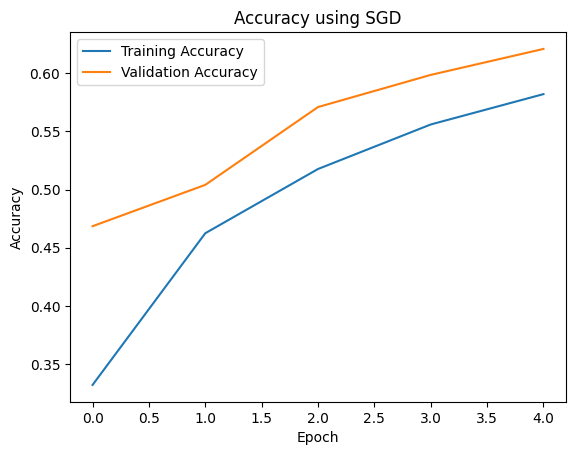

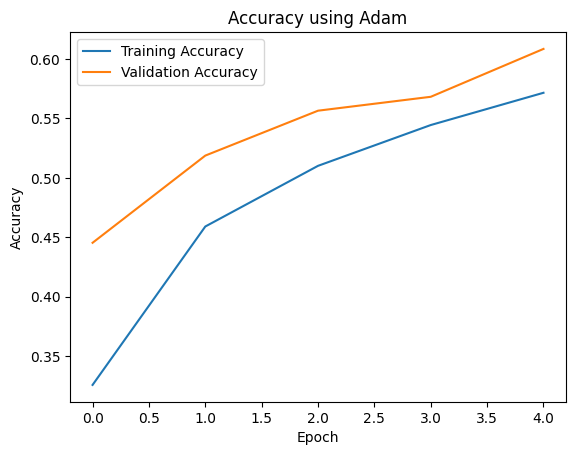

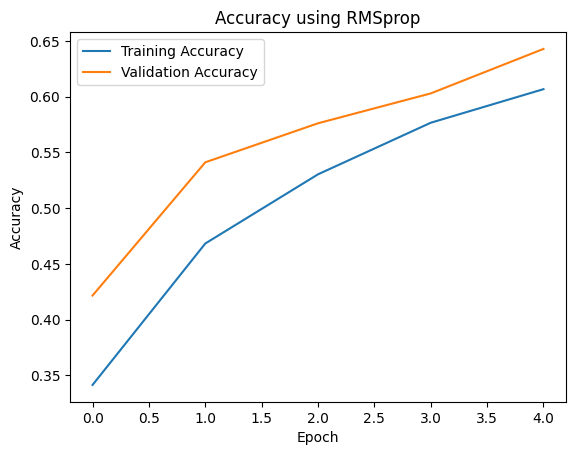

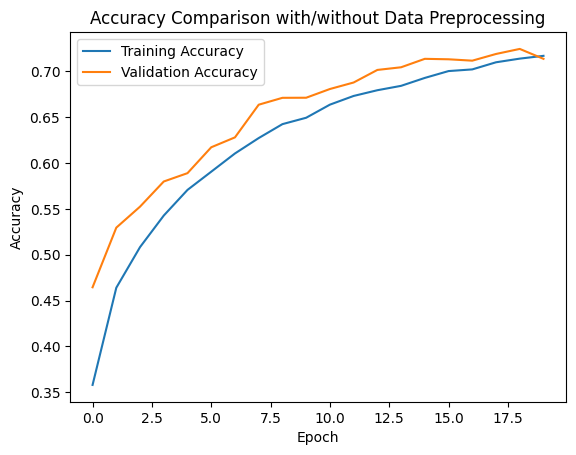

In [20]:
# Importing libraries for plotting
import matplotlib.pyplot as plt

# Function to plot accuracy curves
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot accuracy curves for each optimizer
for optimizer_name, history in results.items():
    plot_accuracy(history, f'Accuracy using {optimizer_name}')

# Plot accuracy comparison for data preprocessing
plt.plot(history_no_preprocessing.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_preprocessing.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Comparison with/without Data Preprocessing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
